In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SocialAds.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [6]:
x_train.shape, x_test.shape

((280, 2), (120, 2))

Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

The returned scaled values are stored in an numpy array, so we'll next convert it to pandas data frame

In [8]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [18]:
x_test_scaled.shape

(120, 2)

In [9]:
x_test.shape

(120, 2)

In [10]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [11]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


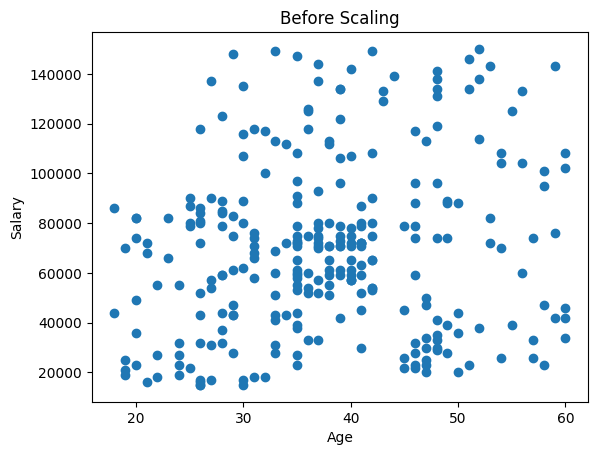

In [13]:
plt.scatter(x_train['Age'], x_train['EstimatedSalary'])
plt.ylabel('Salary')
plt.xlabel('Age')
plt.title('Before Scaling')
plt.show()

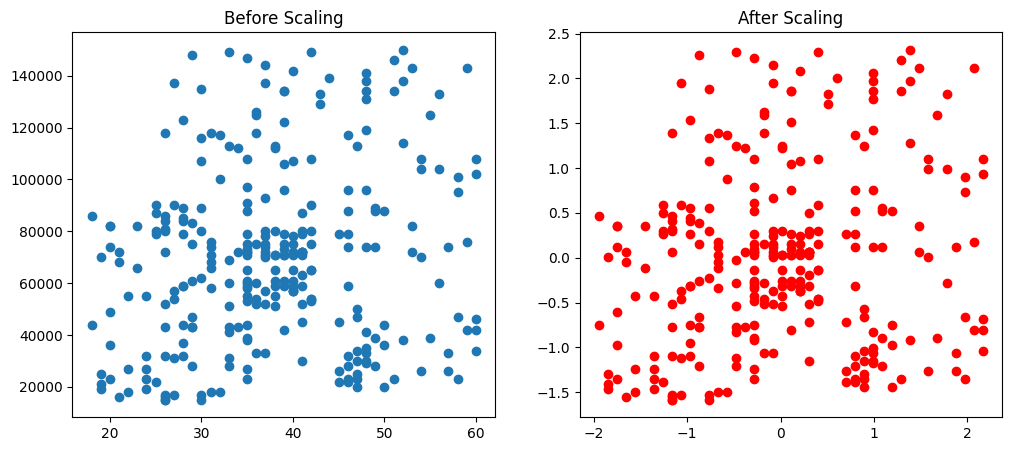

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color = 'r')
ax2.set_title('After Scaling')
plt.show()

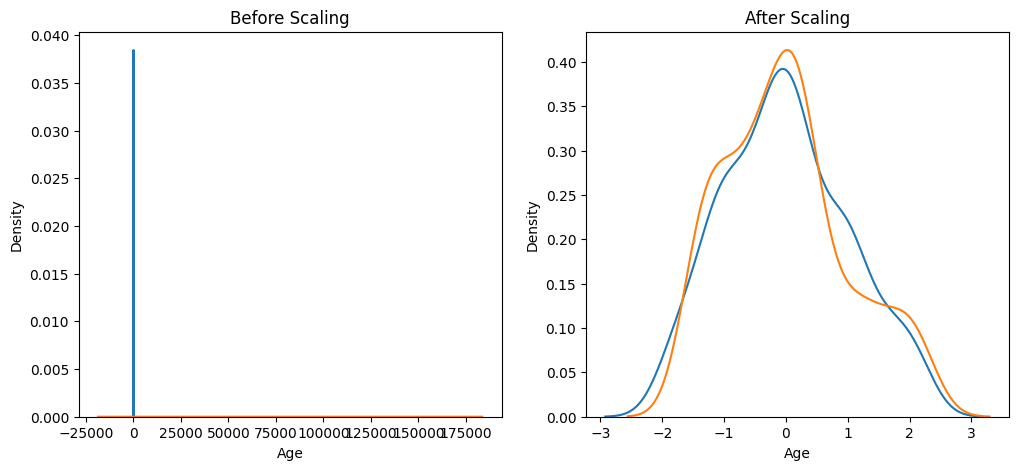

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')

sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

Distribution is obviously retained, only the scale changes.

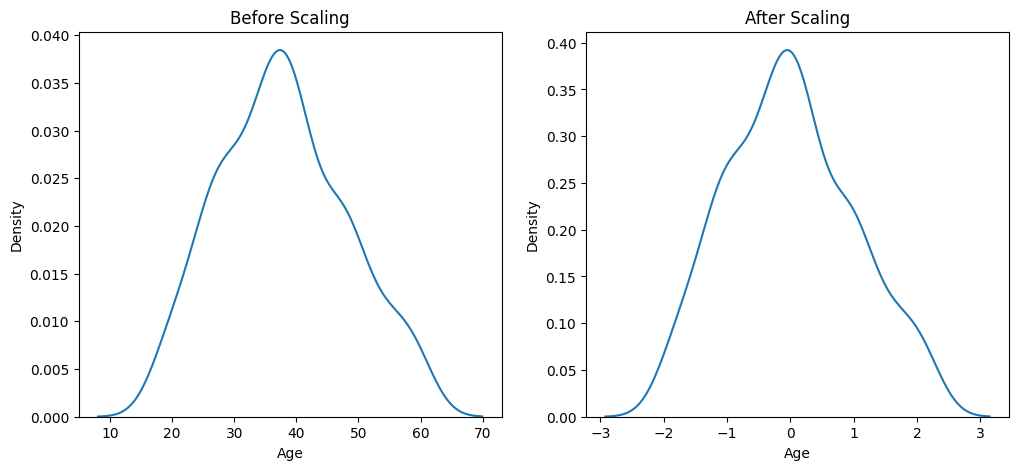

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')

sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

plt.show()

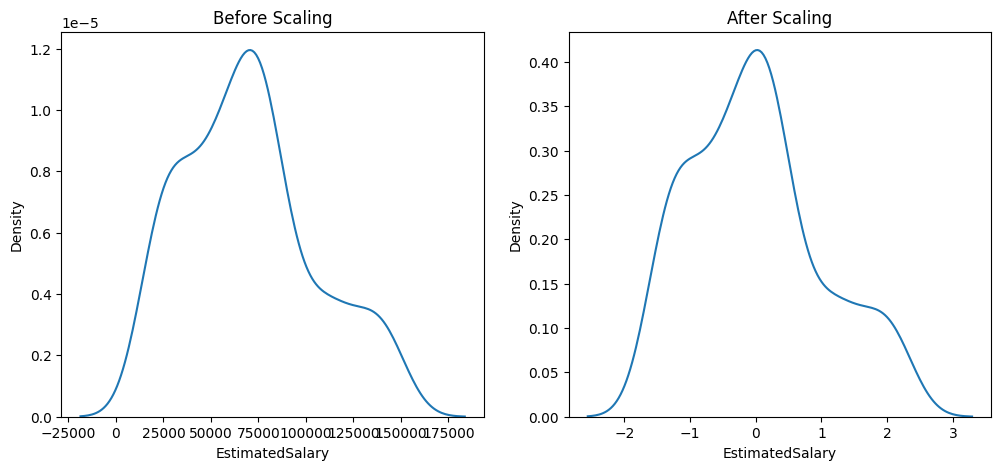

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')

sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()